# Salary Predict with Nonlinear Regression Models in Hitters Dataset

### This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

#### In this notebook, We will use Knn, Svr, CART, RF, GBM, XGBoost, LigthGBM, CatB from nonlinear models.

- A data frame with 322 observations of major league players on the following 20 variables.
- AtBat Number of times at bat in 1986
- Hits Number of hits in 1986
- HmRun Number of home runs in 1986
- Runs Number of runs in 1986
- RBI Number of runs batted in in 1986
- Walks Number of walks in 1986
- Years Number of years in the major leagues
- CAtBat Number of times at bat during his career
- CHits Number of hits during his career
- CHmRun Number of home runs during his career
- CRuns Number of runs during his career
- CRBI Number of runs batted in during his career
- CWalks Number of walks during his career
- League A factor with levels A and N indicating player’s league at the end of 1986
- Division A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts Number of put outs in 1986
- Assists Number of assists in 1986
- Errors Number of errors in 1986
- Salary 1987 annual salary on opening day in thousands of dollars
- NewLeague A factor with levels A and N indicating player’s league at the beginning of 1987

### The results at the end of the notebook are as in the tables below. The best results were obtained with the RF model.

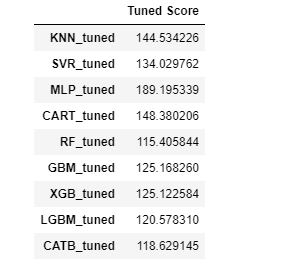

# 1. Data Understanding

In [52]:
#Installation of required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [53]:
#Reading the dataset
df = pd.read_csv("/kaggle/input/hitters/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [54]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [55]:
#Summary information about features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [56]:
df.shape

(322, 20)

In [57]:
# Number of unique observations in variables
df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [58]:
#How many missing values?
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [59]:
#Eksik verilere bakış
df[df["Salary"].isnull()].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A


In [60]:
df["League"].value_counts()

A    175
N    147
Name: League, dtype: int64

In [61]:
df["NewLeague"].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

In [62]:
df["Division"].value_counts()

W    165
E    157
Name: Division, dtype: int64

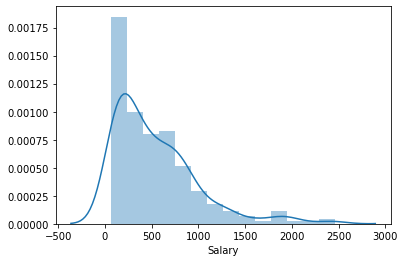

In [63]:
#Distribution of dependent variable
sns.distplot(df.Salary);

In [64]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are CRBI and CRuns. As these increase, Salary (Salary) variable increases.
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


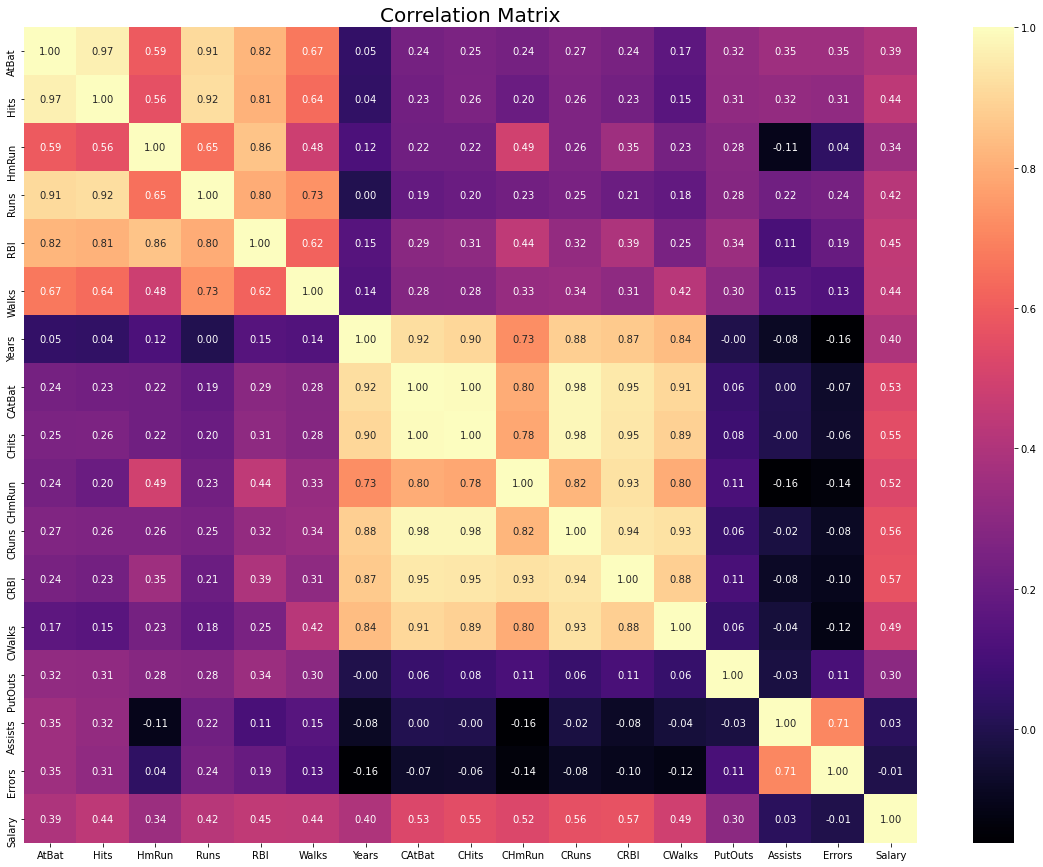

In [65]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# 2. Data Preprocessing

In [66]:
# The variables related to their careers were divided into career years and new values were created in the data set by obtaining average values.
df["AvgCAtBat"]=df["CAtBat"]/df["Years"]
df["AvgCHits"]=df["CHits"]/df["Years"]
df["AvgCHmRun"]=df["CHmRun"]/df["Years"]
df["AvgCRuns"]=df["CRuns"]/df["Years"]
df["AvgCRBI"]=df["CRBI"]/df["Years"]
df["AvgCWalks"]=df["CWalks"]/df["Years"]

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,AvgCAtBat,AvgCHits,AvgCHmRun,AvgCRuns,AvgCRBI,AvgCWalks
0,293,66,1,30,29,14,1,293,66,1,...,33,20,NaN,A,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


In [67]:
#Based on some trials and correlation results, we subtract variables that do not contribute to the model from our data set.
df = df.drop(['AtBat','Hits','HmRun','Runs','RBI','Walks',"PutOuts",'Assists','Errors',
              'League','NewLeague',"Division"],axis=1)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Years      322 non-null    int64  
 1   CAtBat     322 non-null    int64  
 2   CHits      322 non-null    int64  
 3   CHmRun     322 non-null    int64  
 4   CRuns      322 non-null    int64  
 5   CRBI       322 non-null    int64  
 6   CWalks     322 non-null    int64  
 7   Salary     263 non-null    float64
 8   AvgCAtBat  322 non-null    float64
 9   AvgCHits   322 non-null    float64
 10  AvgCHmRun  322 non-null    float64
 11  AvgCRuns   322 non-null    float64
 12  AvgCRBI    322 non-null    float64
 13  AvgCWalks  322 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 35.3 KB


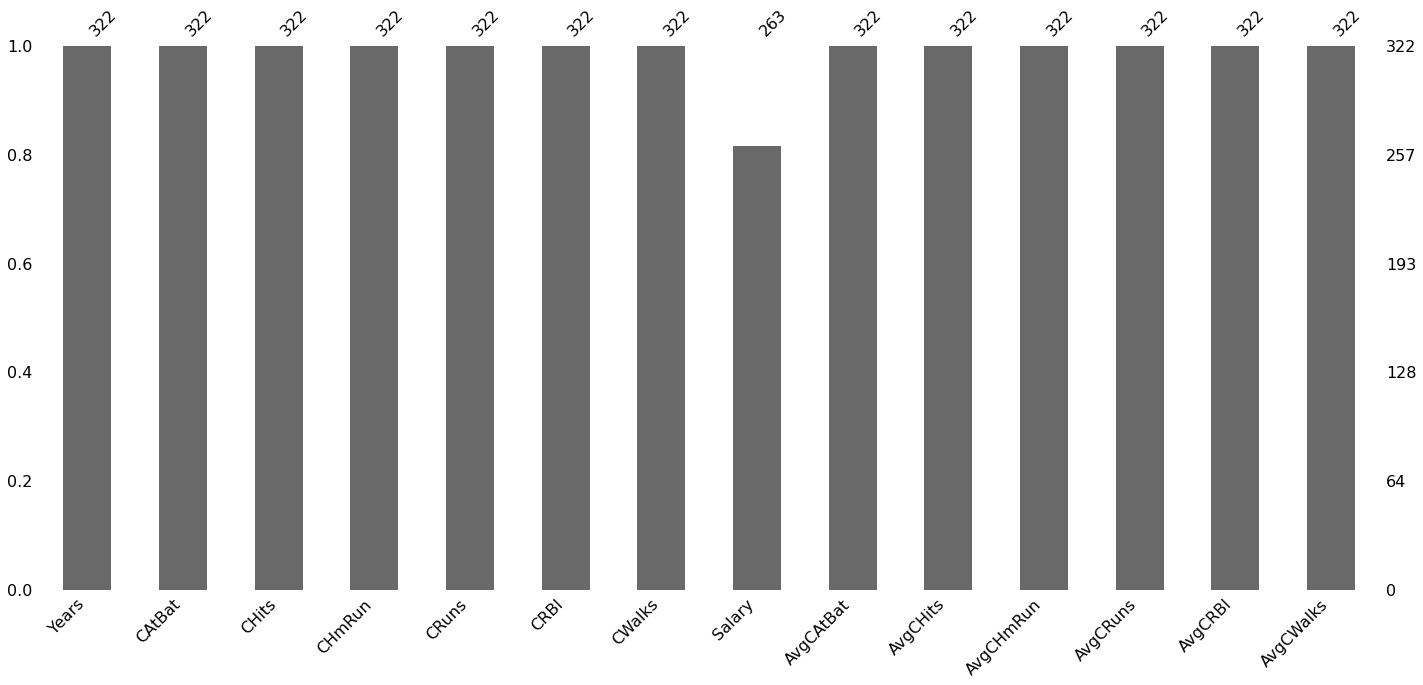

In [69]:
# Eksik gözlemlerin görselleştirilmesi için missingno kütüphanesi kullanılarak eksik gözlemler görselleştirilmiştir.
import missingno as msno
msno.bar(df);

In [70]:
#We fill in the missing observations with the KNN method.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 4)
df_filled = imputer.fit_transform(df)

In [71]:
df = pd.DataFrame(df_filled,columns = df.columns)
df.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,AvgCAtBat,AvgCHits,AvgCHmRun,AvgCRuns,AvgCRBI,AvgCWalks
0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,81.25,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,475.00,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,480.00,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,500.00,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,2.0,396.0,101.0,12.0,48.0,46.0,33.0,91.50,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


In [72]:
#We conduct a stand alone observation review for the salary variable
#We suppress contradictory values
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Salary"] > upper,"Salary"] = upper

In [73]:
#We determine outliers between all variables with the Lof method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [74]:
df_scores = lof.negative_outlier_factor_

In [75]:
np.sort(df_scores)[0:30]

array([-5.54162663, -4.81973809, -4.62812671, -4.62728308, -4.61787559,
       -4.61613196, -4.55560988, -1.80160101, -1.72009937, -1.66395107,
       -1.58042035, -1.51613115, -1.49327573, -1.49116767, -1.47100199,
       -1.46339584, -1.44804009, -1.42081883, -1.41319949, -1.38592254,
       -1.33683984, -1.32584031, -1.32251276, -1.3224799 , -1.31487229,
       -1.31380446, -1.3073428 , -1.30715075, -1.30192549, -1.2960993 ])

In [76]:
#We choose the threshold value according to lof scores
th = np.sort(df_scores)[7]
th

-1.8016010062553822

In [77]:
#We delete those that are higher than the threshold
df = df[df_scores > th]

In [78]:
df.shape

(314, 14)

# 3. First Results

In [79]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP',MLPRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(("XGBoost", XGBRegressor()))
models.append(("LightGBM", LGBMRegressor()))
models.append(("CatBoost", CatBoostRegressor(verbose = False)))

In [80]:
y = df["Salary"]
X = df.drop("Salary", axis=1)
cols = X.columns
cols

Index(['Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks',
       'AvgCAtBat', 'AvgCHits', 'AvgCHmRun', 'AvgCRuns', 'AvgCRBI',
       'AvgCWalks'],
      dtype='object')

In [81]:
#Feature Selection
#Wrapper Method
#Backward Elimination
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRuns', 'CWalks', 'AvgCAtBat', 'AvgCHits', 'AvgCRBI', 'AvgCWalks']


In [82]:
y = df["Salary"]
X = df[selected_features_BE]

In [83]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [84]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        msg = "%s: (%f)" % (name, rmse)
        print(msg)

KNN: (144.248114)
SVR: (290.012914)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP: (495.045988)
CART: (187.419160)
RF: (123.564385)
GBM: (144.950831)
XGBoost: (135.609383)
LightGBM: (139.644709)
CatBoost: (130.408829)


# 4. Model Tuning

 ## 4.1 KNN model tuning

In [85]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

knn_model = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

In [86]:
knn_cv_model.best_params_

{'n_neighbors': 6}

In [87]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

In [88]:
y_pred = knn_tuned.predict(X_test)
knn_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
knn_tuned_score

144.53422633110452

## 4.2 SVR model tuning

In [89]:
#nonlinear
svr_model = SVR() 

svr_params = {"C": [0.01, 0.1,0.3,0.5,0.8,1,5, 10, 50, 100,500,1000,10000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose =  2).fit(X_train, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    0.6s finished


In [90]:
svr_cv_model.best_params_

{'C': 1000}

In [91]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)

In [92]:
y_pred = svr_tuned.predict(X_test)
svr_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
svr_tuned_score

134.02976168002692

## 4.3 CART model tuning

In [93]:
cart_params = {"max_depth": [2,3,4,5,6,8,10,20,30,50, 100, 500, 1000,5000,10000],
              "min_samples_split": [2,5,10,20,30,50,100,500,1000,5000,10000]}

In [94]:
cart_model = DecisionTreeRegressor()

In [95]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [96]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [97]:
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)

In [98]:
y_pred = cart_tuned.predict(X_test)
cart_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
cart_tuned_score

148.38020582922016

## 4.4 RF model tuning

In [99]:
rf_params = {"max_depth": [5,10,None],
            "max_features": [2,5,10],
            "n_estimators": [100, 500, 1000],
            "min_samples_split": [2,10,30]}

In [100]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [101]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.6min finished


In [102]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [143]:
rf_tuned = RandomForestRegressor(max_depth=30,
            max_features=3,
            n_estimators=1000,
            min_samples_split=3).fit(X_train, y_train)

In [144]:
y_pred = rf_tuned.predict(X_test)
rf_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
rf_tuned_score

115.40584401728695

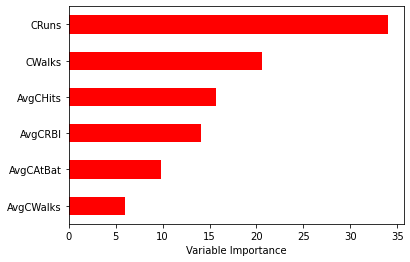

In [105]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 4.5 GBM model tuning

In [106]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [200,500,1000],
             "subsample": [1,0.5,0.8]
             }

In [107]:
gbm_model = GradientBoostingRegressor()

In [108]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.2min finished


In [109]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}

In [110]:
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)

In [111]:
y_pred = gbm_tuned.predict(X_test)
gbm_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_tuned_score

125.16825979628807

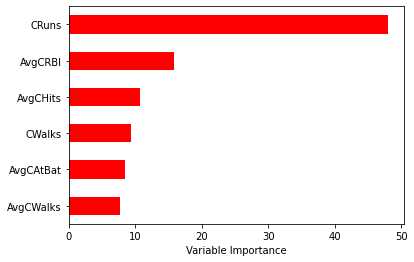

In [112]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 4.6 XGBoost model tuning

In [113]:
xgb_params = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [100,500,1000],
             "colsample_bytree": [0.3,0.6,1]}

In [114]:
xgb = XGBRegressor()

In [115]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.4s
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   31.5s finished


In [116]:
xgb_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500}

In [117]:
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)

In [118]:
y_pred = xgb_tuned.predict(X_test)
xgb_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_tuned_score

125.12258371475984

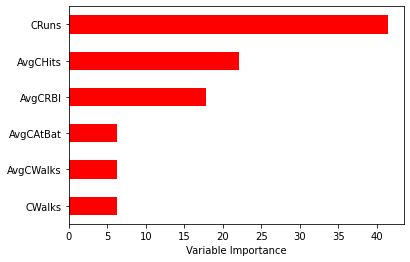

In [119]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 4.7 LightGBM model tuning

In [120]:
lgb_model = LGBMRegressor()

In [121]:
lgbm_params = {"learning_rate": [0.01, 0.1, 1],
              "n_estimators": [200,1000,10000],
              "max_depth": [2,5,10],
              "colsample_bytree": [1,0.5,0.3]}

In [122]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.3min finished


In [123]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 200}

In [124]:
lgbm_tuned = LGBMRegressor(learning_rate=0.01,
              n_estimators=300,
              max_depth=5,
              colsample_bytree=1).fit(X_train, y_train)

In [125]:
y_pred = lgbm_tuned.predict(X_test)
lgbm_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
lgbm_tuned_score

120.57831012302896

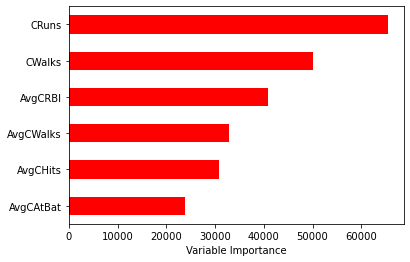

In [126]:
Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = cols)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 4.8 CatBoost model tuning

In [127]:
catb_model = CatBoostRegressor(verbose = False)

In [128]:
catb_params = {"iterations": [500,1000,10000],
              "learning_rate": [0.01,0.1,1],
              "depth": [2,6,10]}

In [129]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 23.0min finished


In [130]:
catb_cv_model.best_params_

{'depth': 10, 'iterations': 500, 'learning_rate': 0.1}

In [131]:
catb_tuned = CatBoostRegressor(iterations=670,
              learning_rate=0.01,
              depth=6,verbose=False).fit(X_train, y_train)

In [132]:
y_pred = catb_tuned.predict(X_test)
catb_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
catb_tuned_score

118.62914543985976

## 4.9 MLP model tuning

In [133]:
mlp = MLPRegressor()

In [134]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]}

In [135]:
mlp_cv_model = GridSearchCV(mlp, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.4min finished
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [136]:
mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [137]:
y_pred = mlp_tuned.predict(X_test)
mlp_tuned_score = np.sqrt(mean_squared_error(y_test, y_pred))
mlp_tuned_score

189.19533909103646

In [145]:
index = ["KNN_tuned","SVR_tuned","MLP_tuned","CART_tuned","RF_tuned","GBM_tuned","XGB_tuned","LGBM_tuned","CATB_tuned"]
tuned_score_df = pd.DataFrame({"Tuned Score":[knn_tuned_score,svr_tuned_score,mlp_tuned_score,cart_tuned_score,
                                              rf_tuned_score,gbm_tuned_score,xgb_tuned_score,lgbm_tuned_score,catb_tuned_score]})
tuned_score_df.index = index
tuned_score_df

,Tuned Score
KNN_tuned,144.534226
SVR_tuned,134.029762
MLP_tuned,189.195339
CART_tuned,148.380206
RF_tuned,115.405844
GBM_tuned,125.168260
XGB_tuned,125.122584
LGBM_tuned,120.578310
CATB_tuned,118.629145
